In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

**Tidal Data Exploration**

Our aim is to explore the tidal data collected over the period 1980-2018 from the gauge located at Whitby.  

In [68]:
data1 = pd.read_csv("C:\\Users\\u2094706\\Downloads\\RN-2686_1638457979707\\Whitby_19800101_19890413.csv")
data1.tail()

,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
81375,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 15:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
81376,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 16:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
81377,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 17:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
81378,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 18:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
81379,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 19:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N


In [69]:
data2 = pd.read_csv("C:\\Users\\u2094706\\Desktop\\Whitby_19890413_20180430.csv")
print("Data shape:",data2.shape)
data2.head()

Data shape: (920692, 12)


,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
0,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 20:00:00,"""Surface elevation (unspecified datum) of the...",3.534,
1,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 21:00:00,"""Surface elevation (unspecified datum) of the...",4.014,
2,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 22:00:00,"""Surface elevation (unspecified datum) of the...",4.238,
3,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/13 23:00:00,"""Surface elevation (unspecified datum) of the...",4.197,
4,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1989/04/14 00:00:00,"""Surface elevation (unspecified datum) of the...",3.969,


In [70]:
data = pd.concat([data1,data2],axis=0)
print(data.shape)
data.head()

(1002072, 12)


,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
0,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/01/01 00:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
1,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/01/01 01:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
2,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/01/01 02:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
3,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/01/01 03:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N
4,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/01/01 04:00:00,"""Surface elevation (unspecified datum) of the...",-99.0,N


**Quality Control Filtering**

We can filter the dataset using the BDOC QC flag parameters. By filtering for only those values with no QC flag we obtain only the probably empirical data values. 

In [71]:
qc_vals = data['QC flag'].unique()
qc_vals

array([' N', '  ', ' M', ' T'], dtype=object)

In [72]:
f_data = data[data['QC flag']==data['QC flag'].unique()[1]]
print("Filtered data shape:",f_data.shape)
f_data.head()

Filtered data shape: (846449, 12)


,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
3258,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 18:00:00,"""Surface elevation (unspecified datum) of the...",4.852,
3259,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 19:00:00,"""Surface elevation (unspecified datum) of the...",3.839,
3260,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 20:00:00,"""Surface elevation (unspecified datum) of the...",2.668,
3261,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 21:00:00,"""Surface elevation (unspecified datum) of the...",1.533,
3262,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 22:00:00,"""Surface elevation (unspecified datum) of the...",0.687,


In [73]:
N = len(f_data)

**Plot entire data series**

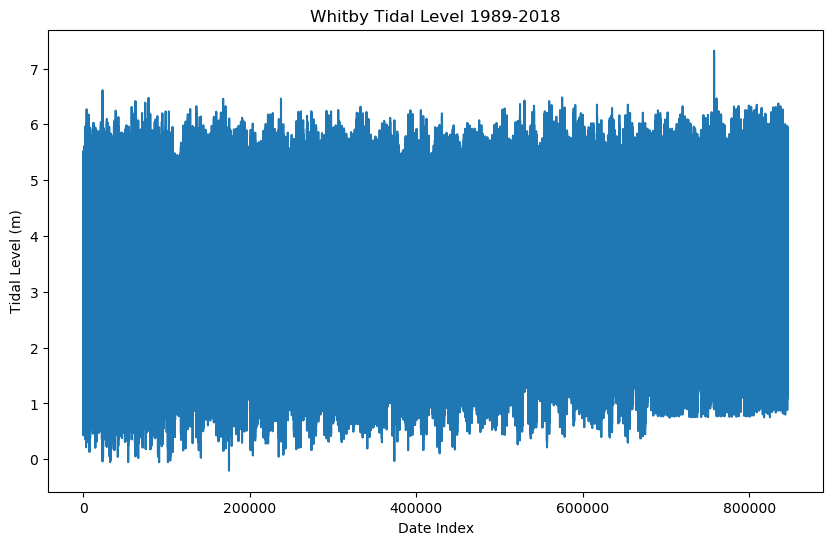

In [74]:
## plot entire range of data values 

plt.figure(figsize=(10,6))
plt.plot(f_data[' "Data value"'].values)
plt.ylabel("Tidal Level (m)")
plt.xlabel("Date Index")
plt.title("Whitby Tidal Level 1989-2018")
plt.show()

In the above figure we observe a large number of obvious anomalies. Will be necessary to remove these anomalies. 

**Removal of anomalies**

step i) Filter out any negative values, absolute tidal elevation values are strictly positive. 

step ii) Filter any values below 'lowest astranomical tide' value provided by National Tidal and Sea Level Facility

In [75]:
LAT = 0.22

Filtered data shape: (846276, 12)


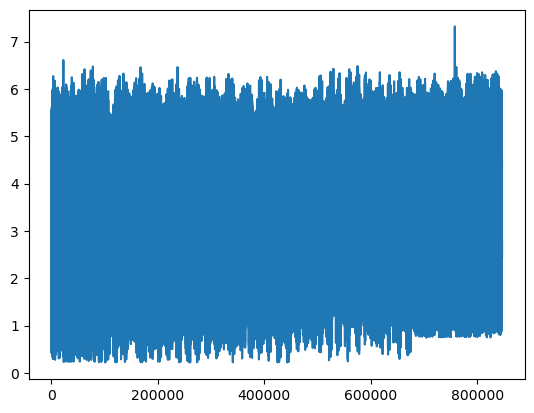

In [76]:
f_data = f_data[f_data[' "Data value"']>=0.22]
print("Filtered data shape:",f_data.shape)
values = f_data[' "Data value"'].values
plt.plot(values)
plt.show()

**Explore Maximum Value**

In [77]:
max_value = np.max(values)
max_instance = f_data[f_data[' "Data value"']==np.max(values)]
max_date = max_instance['Date'].values[0]
max_instance

,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
766393,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,2013/12/05 17:15:00,"""Surface elevation (unspecified datum) of the...",7.319,


Maximum value occurred on December 5th 2013, when an unprecedented storm surge occurred in coastal regions of the Souther North Sea

We can conclude therefore this is not an anomalous maximum value. 

We can assess the perceived probability of observing such a value prior to the event using probability distributions estimated from empirical data.

In [78]:
print(max_date)

2013/12/05 17:15:00


**Explore dataset from origin to 1-day prior to highest tidal elevation value recorded**

In [79]:
prior_data = f_data[f_data['Date']<'2013/12/04 17:15:00']
print("Prior dataset shape:",prior_data.shape)
prior_data.head()

Prior dataset shape: (757471, 12)


,Site Name,Country,Contributor,Latitude,Longitude,Coordinate System,Datum Information,Quality Control,Date,Parameter,"""Data value""",QC flag
3258,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 18:00:00,"""Surface elevation (unspecified datum) of the...",4.852,
3259,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 19:00:00,"""Surface elevation (unspecified datum) of the...",3.839,
3260,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 20:00:00,"""Surface elevation (unspecified datum) of the...",2.668,
3261,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 21:00:00,"""Surface elevation (unspecified datum) of the...",1.533,
3262,Whitby,United Kingdom,"National Oceanography Centre, Liverpool",54.49008,-0.61417,World Geodetic System 84,UK Admiralty Chart Datum,Delayed mode validation on the data,1980/05/15 22:00:00,"""Surface elevation (unspecified datum) of the...",0.687,


**Gaussian-based methods**

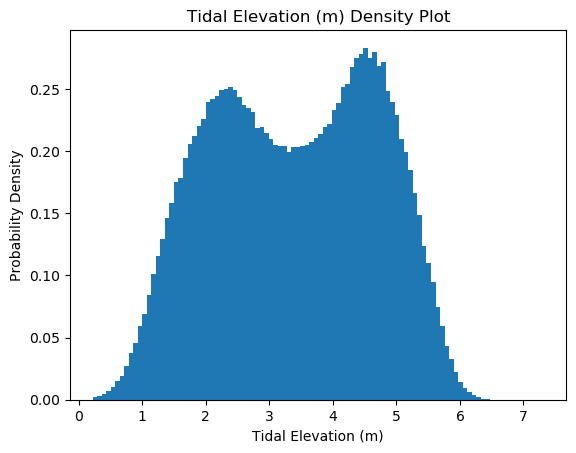

In [80]:
fig = plt.hist(values,density=True,bins=100)
plt.title("Tidal Elevation (m) Density Plot")
plt.ylabel("Probability Density")
plt.xlabel("Tidal Elevation (m)")
plt.show()

Predictably we observe a bimodal distribution with values clustering around 2 peaks which can be interpreted as average low-tide and average high-tide values

We could estimate this density based off the data, constructing a 2-component Gaussian Mixture model would likely simulate this data well.

**Gaussian Mixture Model**

In [81]:
from sklearn.mixture import GaussianMixture
from scipy import stats

In [82]:
gm = GaussianMixture(2)
gm.fit(values.reshape(-1,1))

GaussianMixture(n_components=2)

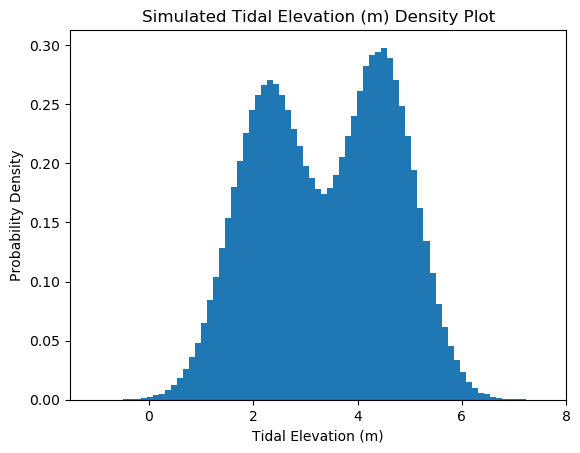

In [83]:
sample = gm.sample(N)[0]

fig=plt.hist(sample,density=True,bins=75)
plt.title("Simulated Tidal Elevation (m) Density Plot")
plt.ylabel("Probability Density")
plt.xlabel("Tidal Elevation (m)")
plt.show()

From a sample of ~850,000 points we can observe what proportion of them exceed the observed maximum value

In [86]:
print("Number of points equal to or in exceedance of maximum observed value:",len(sample[sample>=max_value]))

Number of points equal to or in exceedance of maximum observed value: 4


4 points equal to or in exceedance of the observed maximum. We could crudely conclude that this implies that if we measure the tidal level at any random time under current conditions (ignoring whether it's high tide or low tide) there is an approximately **4-in-850,000 chance** of observing a level observed on Dec 5th 2013.

**Extreme value distribution-based methods**

We can estimate a generalized extreme value distribution based off peaks-over-threshold data collected from our empirical sample.

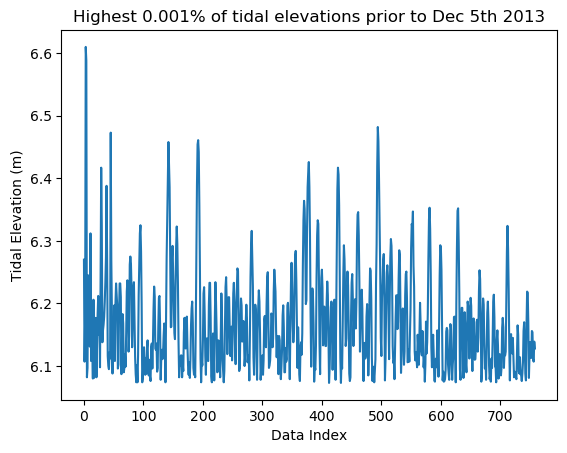

In [87]:
values = prior_data[' "Data value"'].values
uq = np.quantile(values,0.999)
upper_vals = values[values>=uq]

plt.figure()
plt.plot(upper_vals)
plt.title("Highest 0.001% of tidal elevations prior to Dec 5th 2013")
plt.ylabel("Tidal Elevation (m)")
plt.xlabel("Data Index")
plt.show()

**Fit GEV to highest 0.001% of observed values**

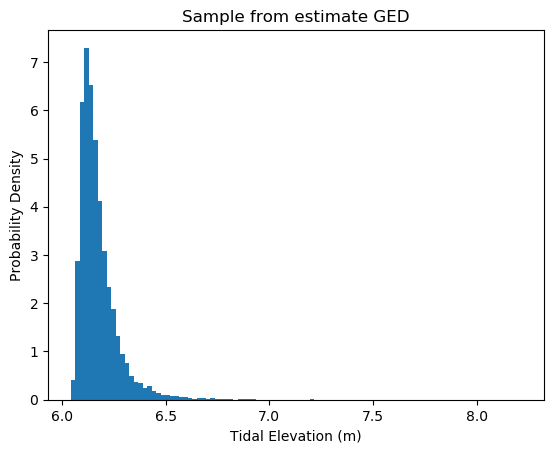

In [89]:
dist = stats.genextreme.fit(upper_vals)
sample = stats.genextreme.rvs(dist[0],dist[1],dist[2], size=10000)

plt.figure()
plt.hist(sample,density=True,bins=100)
plt.title("Sample from estimate GED")
plt.ylabel("Probability Density")
plt.xlabel("Tidal Elevation (m)")
plt.show()

In [90]:
len(sample[sample>=max_value])

3

**3-in-10,000** chance of observing an annual maxima equal to or exceeding the value observed on Dec 5th 2013.This would approximately translate to a 280-year return period rate. 

I believe this shows the inadequacy of distribution-based statistical methods of extreme values.

Scarcity of historical data and likely nonstationarity of underlying generative processes could mean estimating return period values using these methods is inadequate. 

**Monthly maxima approach**

We fit a GEV distribution to monthly maxima data for the period 1980-2018. 

In [22]:
years = [str(i) for i in range(1980,2013)]
months = ['0'+str(i) for i in range(1,10)]
for i in ['10','11','12']:
    months.append(i)
months

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [23]:
# Collect monthly maxima data
maxima = []
counter=0
for i in range(1,len(years)-1):
    yl = years[i-1]+"/01/01 00:00"
    yu = years[i+1]+"/01/01 00:00"
    c1 = f_data['Date']>yl
    c2 = f_data['Date']<yu
    dt = f_data[c1 & c2]
    for j in range(1,len(months)-1):
        ml = years[i]+"/"+months[j-1]+"/01 00:00"
        mu = years[i]+"/"+months[j+1]+"/01 00:00"
        c11 = dt['Date']>ml
        c22 = dt['Date']<mu
        dtt = dt[c11 & c22]
        try:
            maxima.append(np.max(dtt[' "Data value"'].values))
        except:
            pass

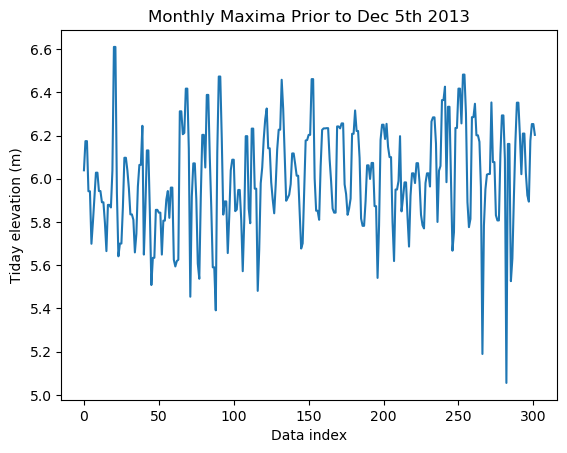

In [24]:
plt.figure()
plt.plot(np.array(maxima))
plt.title("Monthly Maxima Prior to Dec 5th 2013")
plt.ylabel("Tiday elevation (m)")
plt.xlabel("Data index")
plt.show()

**Fit distribution to monthly maxima**

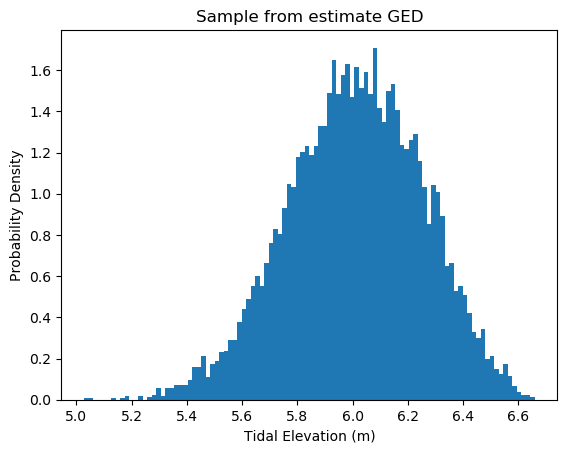

In [91]:
dist = stats.genextreme.fit(maxima)
sample = stats.genextreme.rvs(dist[0],dist[1],dist[2], size=10000)

plt.figure()
plt.hist(sample,density=True,bins=100)
plt.title("Sample from estimate GED")
plt.ylabel("Probability Density")
plt.xlabel("Tidal Elevation (m)")
plt.show()

For the distribution estimated from monthly maxima none of the sampled values were equal to or exceeded the observed value of Dec 5th. 

Again illustrating that extrapolating from empirical data to estimate return periods or extreme hypothetical values using such a methodology is not suitable.